**学号：** 2310650118  &nbsp; **姓名：** 洪菁曼  &nbsp; **班级：** 信息2301 

# 报告1 使用决策树识别恶性肿瘤

## 提交要求
1. 填写Word版实验报告表格；
2. 提交jupyter笔记和该笔记PDF；
3. 文件名格式示例：
   * `学号-姓名-实验报告.docx`
   * `学号-姓名-实验笔记.ipynb`
   * `学号-姓名-实验笔记.pdf`

> 按群里发的链接提交

## 读取数据

In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X, y = cancer.data, 1 - cancer.target

In [2]:
X.shape, y.shape

((569, 30), (569,))

In [3]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

##  将数据分成训练集和测试集

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, 
                                                    test_size=0.25, random_state=1)


print(f"X's shape: {X.shape}, y's shape: {y.shape}")
print(f"X_train's shape: {X_train.shape}, y_train's shape: {y_train.shape}")

X's shape: (569, 30), y's shape: (569,)
X_train's shape: (426, 30), y_train's shape: (426,)


## 建立决策树模型

In [5]:
from sklearn.tree import DecisionTreeClassifier

cancer_tree = DecisionTreeClassifier(max_depth=3, random_state=0)
cancer_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

## 使用accuracy评测模型

Accuracy on training set: 0.972
Accuracy on test set: 0.923


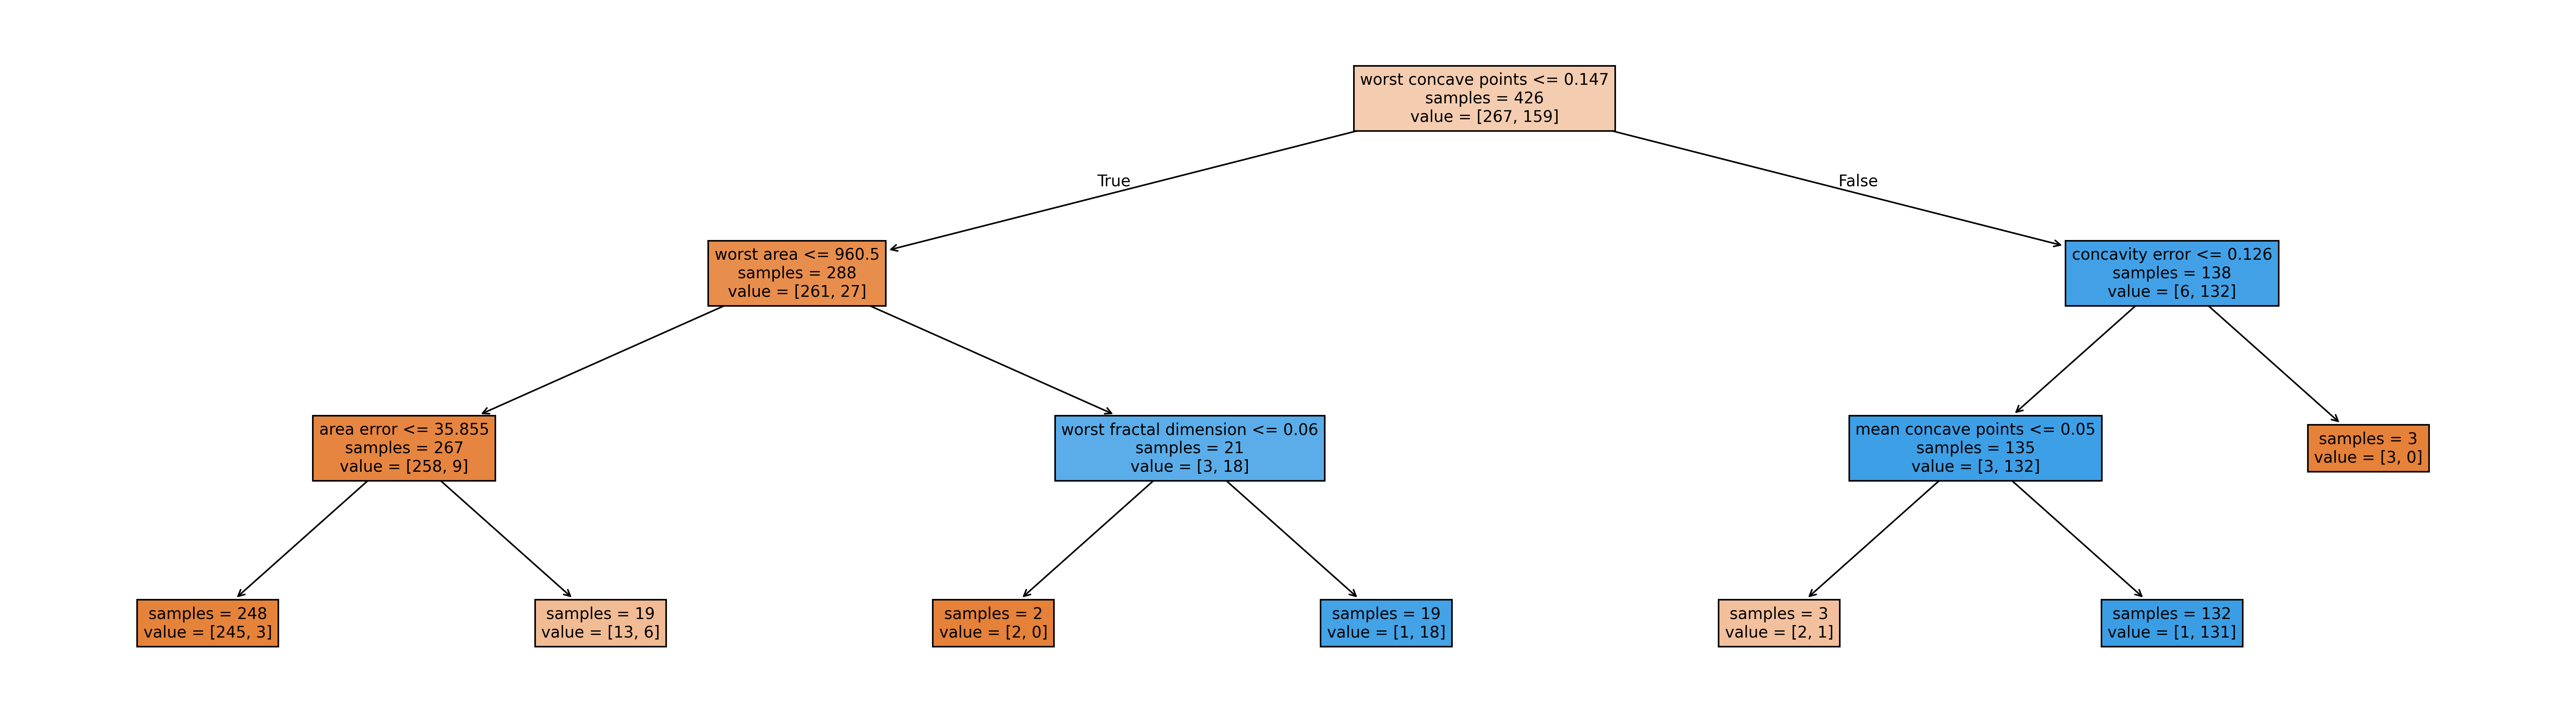

In [7]:
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

pred_train = cancer_tree.predict(X_train)
pred_test = cancer_tree.predict(X_test)

print(f'Accuracy on training set: { accuracy_score(y_train, pred_train) :0.3f}')
print(f'Accuracy on test set: { accuracy_score(y_test, pred_test) :0.3f}')

plt.figure(figsize=(29, 8), dpi=300)
plot_tree(cancer_tree, feature_names=cancer.feature_names, impurity=False, filled=True, fontsize=10)
plt.show()